## Exploratory Data Analysis

### Part 2: Tasks 1 to 5

This EDA has the goal to understand and interpret the patterns and relationships presented between the variables of the *flights* table with the goal to explore which variables are important to predict flights delays.

First, let's start with the flights table exploration before moving forward to our task 1.

In [50]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [51]:
# Loading the .csv file to be read in a pandas df

train_flights_subset = pd.read_csv("/Users/rafaelaqueiroz/Mid-Term-Project-I/train_flights_subset.csv", sep = ",")
train_flights_subset.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-13,AA,AA_CODESHARE,AA,4850,PT,N657AE,4850,15096,SYR,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08,B6,B6,B6,168,B6,N633JB,168,13796,OAK,...,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,UA,UA_CODESHARE,UA,5068,OO,N975SW,5068,11027,CKB,...,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-27,WN,WN,WN,388,WN,N968WN,388,10821,BWI,...,430,48.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-05-27,WN,WN,WN,1353,WN,N8575Z,1353,12339,IND,...,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-12,AA,AA_CODESHARE,AA,3696,MQ,N667GB,3696,13930,ORD,...,135,0.0,0.0,36.0,0.0,18.0,NaN,NaN,NaN,NaN
6,2018-06-24,DL,DL,DL,1180,DL,N909DA,1180,11193,CVG,...,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-10-18,WN,WN,WN,2277,WN,N209WN,2277,13296,MHT,...,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-30,AA,AA,AA,711,AA,N818AW,711,12266,IAH,...,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-03-19,AA,AA,AA,151,AA,N868NN,151,14492,RDU,...,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Calculating the number of rows and columns of the train_flights_subset

train_flights_subset.shape

(7000, 42)

In [53]:
# Verifying data types

train_flights_subset.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

From this columns list, we are going to extract only the columns that look relevant to measure and interpret the delays and then we are going to create a new dataframe with them.

In [54]:
# Creating a new dataframe with only the columns about the delays to focus on that for now

train_flights_delays_subset = train_flights_subset[['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
train_flights_delays_subset

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-9.0,-31.0,NaN,NaN,NaN,NaN,NaN
1,-7.0,4.0,NaN,NaN,NaN,NaN,NaN
2,-4.0,-21.0,NaN,NaN,NaN,NaN,NaN
3,61.0,48.0,48.0,0.0,0.0,0.0,0.0
4,-2.0,6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6995,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
6996,-9.0,-38.0,NaN,NaN,NaN,NaN,NaN
6997,-3.0,-16.0,NaN,NaN,NaN,NaN,NaN
6998,-8.0,-25.0,NaN,NaN,NaN,NaN,NaN


In [55]:
# As we can see there are some NaN in our data frame
# Verifying missing values 

train_flights_delays_subset.isnull()

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,False,False,True,True,True,True,True
1,False,False,True,True,True,True,True
2,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False
4,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...
6995,False,False,True,True,True,True,True
6996,False,False,True,True,True,True,True
6997,False,False,True,True,True,True,True
6998,False,False,True,True,True,True,True


In [56]:
# Before handling the missing values, let's check the count of those by column

train_flights_delays_subset.isnull().sum()

dep_delay               111
arr_delay               132
carrier_delay          5703
weather_delay          5703
nas_delay              5703
security_delay         5703
late_aircraft_delay    5703
dtype: int64

In [57]:
# Replacing missing values with mean

train_flights_delays_subset.fillna(train_flights_delays_subset.mean(), inplace=True)
train_flights_delays_subset

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-9.0,-31.0,19.782575,2.678489,17.033153,0.087124,26.690825
1,-7.0,4.0,19.782575,2.678489,17.033153,0.087124,26.690825
2,-4.0,-21.0,19.782575,2.678489,17.033153,0.087124,26.690825
3,61.0,48.0,48.000000,0.000000,0.000000,0.000000,0.000000
4,-2.0,6.0,19.782575,2.678489,17.033153,0.087124,26.690825
...,...,...,...,...,...,...,...
6995,-3.0,-5.0,19.782575,2.678489,17.033153,0.087124,26.690825
6996,-9.0,-38.0,19.782575,2.678489,17.033153,0.087124,26.690825
6997,-3.0,-16.0,19.782575,2.678489,17.033153,0.087124,26.690825
6998,-8.0,-25.0,19.782575,2.678489,17.033153,0.087124,26.690825


In [58]:
# Normalizing data using z-score normalization

train_flights_delays_zscore = train_flights_delays_subset.apply(zscore)
train_flights_delays_zscore

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-0.384215,-0.699374,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
1,-0.343480,-0.017198,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
2,-0.282377,-0.504467,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
3,1.041520,0.840396,1.093682e+00,-2.997590e-01,-7.700349e-01,-0.090995,-1.013955e+00
4,-0.241641,0.021784,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
...,...,...,...,...,...,...,...
6995,-0.262009,-0.192615,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6996,-0.384215,-0.835810,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6997,-0.262009,-0.407013,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6998,-0.363847,-0.582430,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16


Obs.: Both 'dep_delay' and 'arr_delay' variables display the difference in minutes between the scheduled and actual departure/arrival time. Also, early departures and arrivals show negative numbers.	

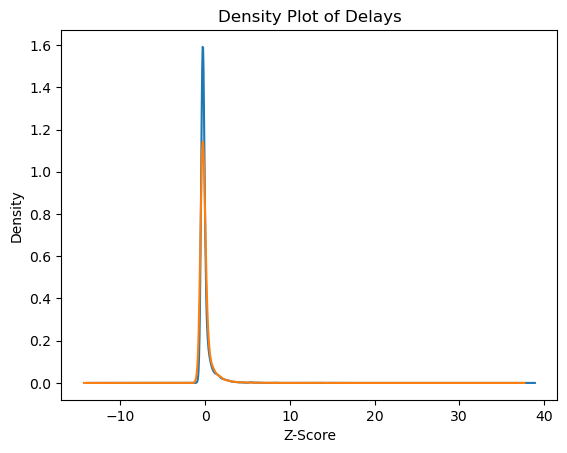

In [59]:
# Ploting a histogram of the the dataset as this is important to see the sample distribution and detect outliers before moving forward with the hypothesis test

# Plotting a density plot for delays columns in the dataset

train_flights_delays_zscore['dep_delay'].plot(kind='density') # In blue
train_flights_delays_zscore['arr_delay'].plot(kind='density') # In orange
# train_flights_delays_zscore['carrier_delay'].plot(kind='density')
# train_flights_delays_zscore['weather_delay'].plot(kind='density')
# train_flights_delays_zscore['nas_delay'].plot(kind='density')
# train_flights_delays_zscore['security_delay'].plot(kind='density')
# train_flights_delays_zscore['late_aircraft_delay'].plot(kind='density')

# Adding labels and title to the plot

plt.xlabel('Z-Score')
plt.title('Density Plot of Delays')
plt.show()

As we can see, all the plots drawn by each column follow the same pattern and have a high kurtosis which is an indicator of a dataset that doesn't follow a normal distribution.

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution, and that the **mean** of the delay is 0. Be careful about the outliers.

After normalizing the data using z-score, we can test the hypothesis that the delay is from a Normal distribution and that the mean of the delay is 0 as requested on this task. For that, we are going to do a normality test first on the 'dep_delay' and after on the 'arr_delay' variable by using the Shapiro-Wilk test, and the t-test on the mean.

In [60]:
# Importing scipy.stats

from scipy.stats import shapiro, ttest_1samp

# Performing Shapiro-Wilk test on the dep_delay column

shapiro_test = shapiro(train_flights_delays_zscore['dep_delay'])

# Printing the test statistic and p-value of the dep_delay

print(f"Shapiro-Wilk test statistic is {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk p-value is {shapiro_test.pvalue:.3e}")

# Performing one-sample t-test on the dep_delay column with null hypothesis that the mean is 0

ttest_result = ttest_1samp(train_flights_delays_zscore['dep_delay'], 0, nan_policy='omit')

# Printting the test statistic and p-value of dep_delay

print(f"t-test statistic is {ttest_result.statistic:.3f}")
print(f"t-test p-value is {ttest_result.pvalue:.3e}")

Shapiro-Wilk test statistic is 0.333
Shapiro-Wilk p-value is 0.000e+00
t-test statistic is 0.000
t-test p-value is 1.000e+00


/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
# Performing Shapiro-Wilk test on the arr_delay column

shapiro_test = shapiro(train_flights_delays_zscore['arr_delay'])

# Printing the test statistic and p-value of the arr_delay

print(f"Shapiro-Wilk test statistic is {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk p-value is {shapiro_test.pvalue:.3e}")

# Performing one-sample t-test on the arr_delay column with null hypothesis that the mean is 0

ttest_result = ttest_1samp(train_flights_delays_zscore['arr_delay'], 0, nan_policy='omit')

# Printing the test statistic and p-value of arr_delay

print(f"t-test statistic is {ttest_result.statistic:.3f}")
print(f"t-test p-value is {ttest_result.pvalue:.3e}")

Shapiro-Wilk test statistic is 0.435
Shapiro-Wilk p-value is 0.000e+00
t-test statistic is -0.000
t-test p-value is 1.000e+00


As we have studied, the Shapiro-Wilk test checks whether a sample comes from a normal distribution or not (the null hypothesis of the test is that the flight delays dataset comes from a normal distribution). According with this theory, if the p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that the data does not come from a normal distribution. 

From our analysis, we can infer that both variables represent statistical significance to test our hypothesis by displaying a p-value of the Shapiro-Wilk test equals to 0 which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that the 'dep_delay' and 'arr_delay' variables are not normally distributed.

In addition to that, the t-test performed also pointed out for both variables a similar value for the mean. The one-sample t-test checks whether the mean of a sample is equal to a given value (the null hypothesis of our test is that the mean of the sample is equal to 0). If the p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that the mean of the sample is different from 0. However as the p-value of both variables is equal to 1, we cannot reject completely the null hypothesis of the t-test that the mean of those variables is far away from 0.

Now, let's plot the results for both variables.

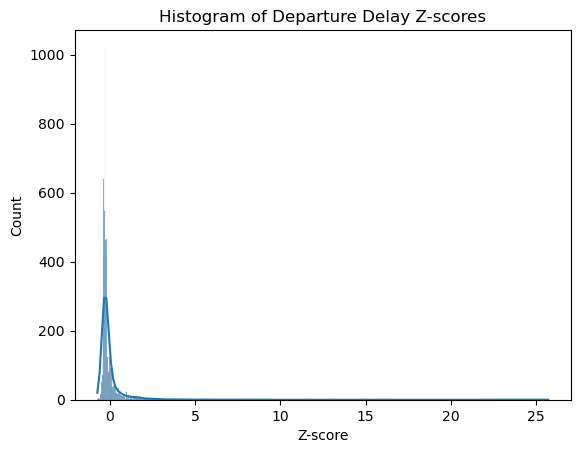

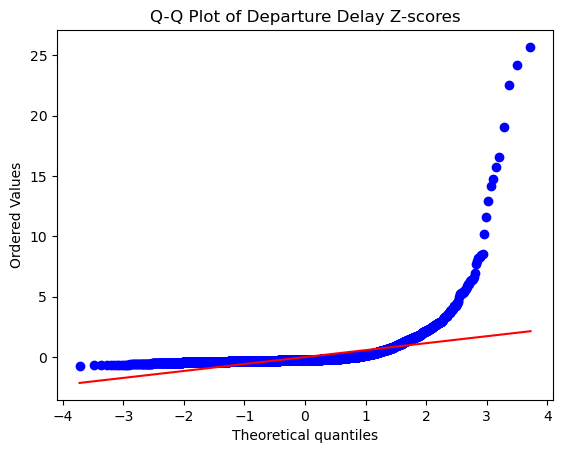

In [62]:
# Creating a histogram of the dep_delay variable

sns.histplot(train_flights_delays_zscore['dep_delay'], kde=True)
plt.xlabel('Z-score')
plt.title('Histogram of Departure Delay Z-scores')
plt.show()

# Creating a Q-Q plot of the dep_delay 

stats.probplot(train_flights_delays_zscore['dep_delay'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Departure Delay Z-scores")
plt.show()

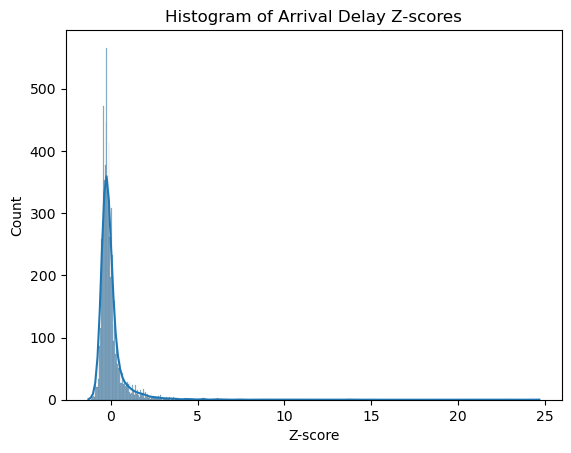

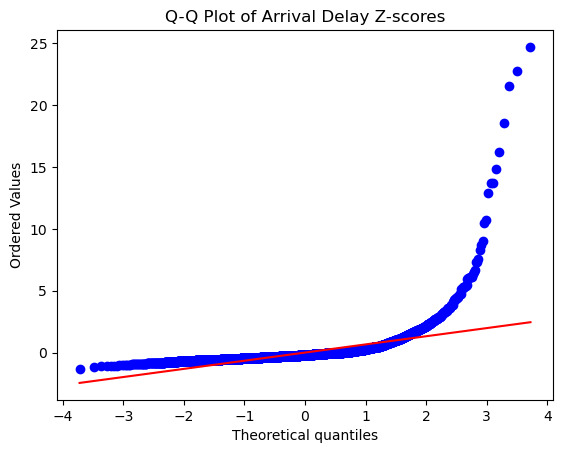

In [63]:
# Creating a histogram of the arr_delay variable

sns.histplot(train_flights_delays_zscore['arr_delay'], kde=True)
plt.xlabel('Z-score')
plt.title('Histogram of Arrival Delay Z-scores')
plt.show()

# Creating a Q-Q plot of the arr_delay 

stats.probplot(train_flights_delays_zscore['arr_delay'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Arrival Delay Z-scores")
plt.show()

Both visualizations of 'dep_delay' and 'arr_delay' suggest that the flight delays are centered around negative values and 0, and that the data doesn't follow a normal distribution. Also, the points on the Q-Q plot follow a straight line in the most part and only present a variation at the end of the graph. In summary, the visualizations correspond to our theorizations stated in the paragraph above.


#### **Task 2**: Is the average/median monthly delay different during the year? If yes, which are the months with the biggest delays and what could be the reason?

In [64]:
# Coming back to the first dataframe to check the months during the year

train_flights_subset_monthly_delay = train_flights_subset[['fl_date', 'dep_delay', 'arr_delay']]
train_flights_subset_monthly_delay

,fl_date,dep_delay,arr_delay
0,2019-11-13,-9.0,-31.0
1,2019-12-08,-7.0,4.0
2,2018-08-01,-4.0,-21.0
3,2018-02-27,61.0,48.0
4,2019-05-27,-2.0,6.0
...,...,...,...
6995,2018-03-26,-3.0,-5.0
6996,2019-02-05,-9.0,-38.0
6997,2018-12-26,-3.0,-16.0
6998,2018-11-10,-8.0,-25.0


In [65]:
# For that, we will use the datetime accessor of pandas to extract the month from the date column

train_flights_subset_monthly_delay.loc[:, 'month'] = pd.to_datetime(train_flights_subset_monthly_delay['fl_date']).dt.month
train_flights_subset_monthly_delay.tail(10)

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fl_date,dep_delay,arr_delay,month
6990,2018-05-06,-5.0,-2.0,5
6991,2019-11-05,0.0,-11.0,11
6992,2019-03-22,95.0,104.0,3
6993,2018-01-29,-6.0,-18.0,1
6994,2019-02-11,15.0,-10.0,2
6995,2018-03-26,-3.0,-5.0,3
6996,2019-02-05,-9.0,-38.0,2
6997,2018-12-26,-3.0,-16.0,12
6998,2018-11-10,-8.0,-25.0,11
6999,2018-05-03,-3.0,-12.0,5


In [66]:
# Deleting some columns from this df

train_flights_subset_monthly_delay = train_flights_subset_monthly_delay.drop('fl_date', axis = 1)
train_flights_subset_monthly_delay

,dep_delay,arr_delay,month
0,-9.0,-31.0,11
1,-7.0,4.0,12
2,-4.0,-21.0,8
3,61.0,48.0,2
4,-2.0,6.0,5
...,...,...,...
6995,-3.0,-5.0,3
6996,-9.0,-38.0,2
6997,-3.0,-16.0,12
6998,-8.0,-25.0,11


In [67]:
# Verifying missing values in the month column

train_flights_subset_monthly_delay.isnull().sum

<bound method DataFrame.sum of       dep_delay  arr_delay  month
0         False      False  False
1         False      False  False
2         False      False  False
3         False      False  False
4         False      False  False
...         ...        ...    ...
6995      False      False  False
6996      False      False  False
6997      False      False  False
6998      False      False  False
6999      False      False  False

[7000 rows x 3 columns]>

In [68]:
# Grouping by the month column and calculate the mean delay for each month

train_flights_subset_monthly_delay_mean = train_flights_subset_monthly_delay[['month', 'dep_delay', 'arr_delay']].groupby('month').mean()
train_flights_subset_monthly_delay_mean

,dep_delay,arr_delay
month,,
1,10.732496,5.338739
2,12.266537,7.350877
3,8.475248,2.856436
4,6.302326,1.938849
5,9.031250,4.404514
6,15.681356,12.607204
7,16.208668,11.050000
8,10.584874,6.131092
9,6.616788,0.978022


In [69]:
# Grouping by the month column and calculate the median delay for each month

train_flights_subset_monthly_delay_median = train_flights_subset_monthly_delay[['month', 'dep_delay', 'arr_delay']].groupby('month').median()
train_flights_subset_monthly_delay_median

,dep_delay,arr_delay
month,,
1,-3.0,-6.0
2,-2.0,-5.0
3,-3.0,-7.0
4,-3.0,-6.0
5,-2.0,-6.0
6,-1.0,-4.0
7,-2.0,-5.0
8,-2.0,-5.0
9,-3.0,-8.0


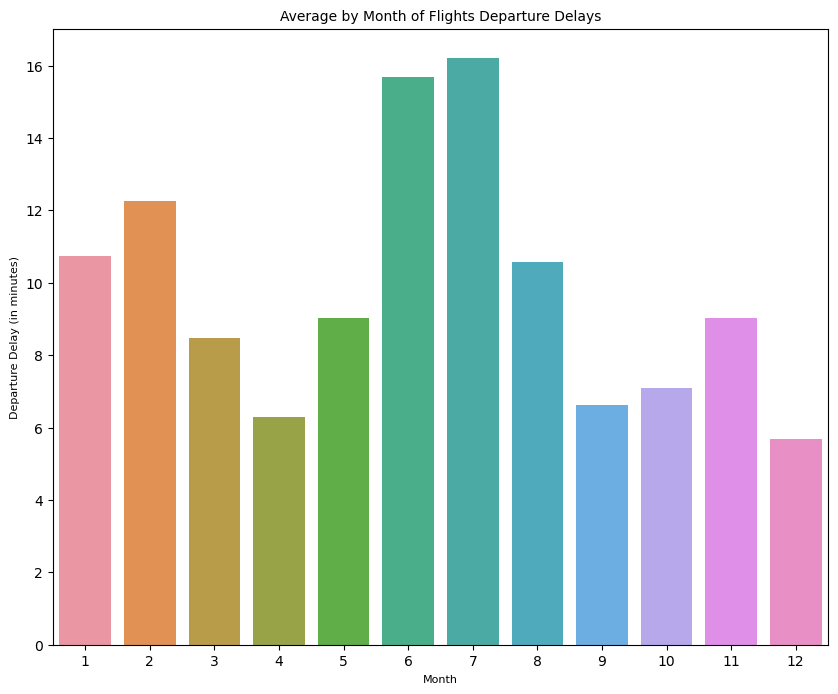

In [70]:
# Plotting the flight delays average to visualize the months with the highest number of departure delays

fig, ax = plt.subplots(figsize=(10, 8))
x = train_flights_subset_monthly_delay_mean.index
y = train_flights_subset_monthly_delay_mean['dep_delay']
sns.barplot(x=x, y=y, ax=ax)

# Setting the titles

ax.set_title("Average by Month of Flights Departure Delays", fontsize=10)
ax.set_xlabel("Month", fontsize=8)
ax.set_ylabel("Departure Delay (in minutes)", fontsize=8)
plt.show()

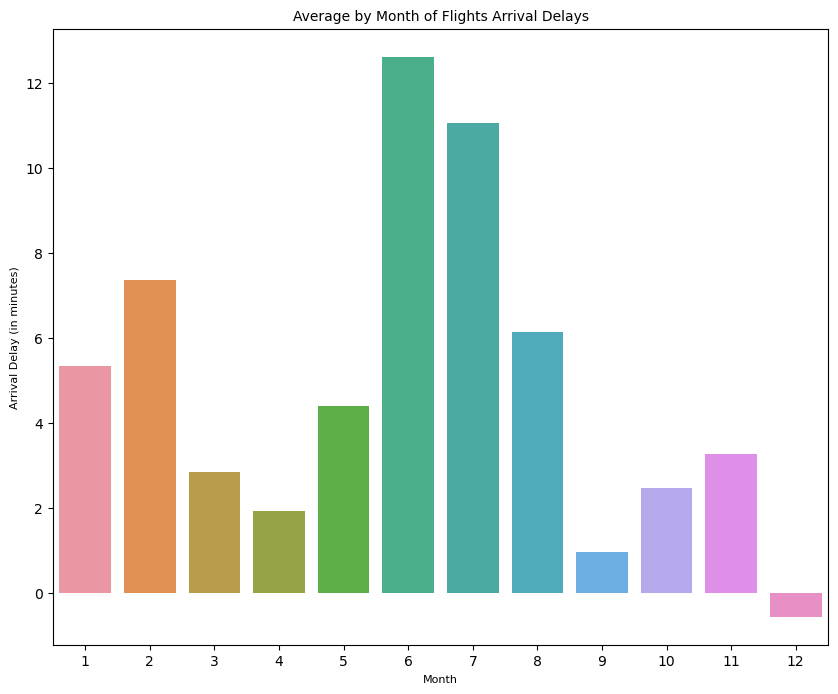

In [71]:
# Plotting the flight delays average to visualize the months with the highest number of arrival delays

fig, ax = plt.subplots(figsize=(10, 8))
x = train_flights_subset_monthly_delay_mean.index
y = train_flights_subset_monthly_delay_mean['arr_delay']
sns.barplot(x=x, y=y, ax=ax)

# Setting the titles

ax.set_title("Average by Month of Flights Arrival Delays", fontsize=10)
ax.set_xlabel("Month", fontsize=8)
ax.set_ylabel("Arrival Delay (in minutes)", fontsize=8)
plt.show()

From those results, it is noted that the monthly average (mean) of the flight departure and arrival delays are not the same during the year. Some months, such as July, June, February, January and August have a higher average of flight departure delays in comparison with the others being July and June with the highest number of flights delays. In regards to arrival delays, those months also coincide with the biggest average delays presented by this variable, therefore both variables represent the same average by month of biggest flights delays.

Also, while there may not be one single reason why June and July tend to be the months with the biggest flight delays, factors such as summer time and family period of vacation, in combination with an increased demand and weather-related disruptions (e.g.hot waves, environmental catastrophes), and other factors can all contribute to delays during these months.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?


To answer that question, we are going to retrieve some of the variables from our train_flights_subset, such as 'origin' column to obtain the airport code for the departure airport and the 'crs_dep_time' column to obtain the scheduled departure time for each flight.
    
Also, we are going to get a request from the *OpenWeatherMap API* (https://openweathermap.org/api) to obtain the weather conditions at the departure airport at the time of the scheduled departure time. 

In [72]:
# Extracting some columns and basic information about the flights from our train_flights_subset

train_flights_subset_weather_and_delay = train_flights_subset[['fl_date', 'origin', 'dest', 'dep_time', 'arr_time', 'crs_dep_time', 'crs_elapsed_time']]
train_flights_subset_weather_and_delay

,fl_date,origin,dest,dep_time,arr_time,crs_dep_time,crs_elapsed_time
0,2019-11-13,SYR,PHL,1306.0,1408.0,1315,84
1,2019-12-08,OAK,JFK,2337.0,807.0,2344,319
2,2018-08-01,CKB,IAD,606.0,653.0,610,64
3,2018-02-27,BWI,CVG,926.0,1058.0,825,105
4,2019-05-27,IND,DEN,638.0,731.0,640,165
...,...,...,...,...,...,...,...
6995,2018-03-26,MIA,PHL,902.0,1151.0,905,171
6996,2019-02-05,PHL,MIA,1041.0,1318.0,1050,186
6997,2018-12-26,CLT,HPN,1117.0,1259.0,1120,115
6998,2018-11-10,SMF,CLT,2220.0,536.0,2228,273


In [73]:
# Retrieving the delay information
# Getting the actual departure time

train_flights_subset_weather_and_delay.loc[:, 'dep_actual_time'] = train_flights_subset['dep_time'] - train_flights_subset['wheels_off']
train_flights_subset_weather_and_delay

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fl_date,origin,dest,dep_time,arr_time,crs_dep_time,crs_elapsed_time,dep_actual_time
0,2019-11-13,SYR,PHL,1306.0,1408.0,1315,84,-10.0
1,2019-12-08,OAK,JFK,2337.0,807.0,2344,319,-17.0
2,2018-08-01,CKB,IAD,606.0,653.0,610,64,-8.0
3,2018-02-27,BWI,CVG,926.0,1058.0,825,105,-13.0
4,2019-05-27,IND,DEN,638.0,731.0,640,165,-12.0
...,...,...,...,...,...,...,...,...
6995,2018-03-26,MIA,PHL,902.0,1151.0,905,171,-14.0
6996,2019-02-05,PHL,MIA,1041.0,1318.0,1050,186,-14.0
6997,2018-12-26,CLT,HPN,1117.0,1259.0,1120,115,-9.0
6998,2018-11-10,SMF,CLT,2220.0,536.0,2228,273,-12.0


In [74]:
# Grouping the data by the origin column and count the number of flights for each origin

origin_counts = train_flights_subset_weather_and_delay.groupby('origin').size()

# Getting the 10 origin airports with the highest number of flights

top_origins = origin_counts.nlargest(10)

# Converting the resulting Series to a dataframe and reset the index

top_origins_df = top_origins.reset_index(name='count')
top_origins_df

,origin,count
0,ORD,361
1,ATL,324
2,DFW,267
3,DEN,233
4,LAX,220
5,CLT,209
6,SEA,170
7,SFO,167
8,IAH,162
9,EWR,158


As the state of Chicago, in Illinois, has the airport with highest count of flights, we are goint to get the *Weather API* for this location.

In [75]:
# Grouping by the df by ORD

train_flights_subset_weather_and_delay.groupby

<bound method DataFrame.groupby of          fl_date origin dest  dep_time  arr_time  crs_dep_time  \
0     2019-11-13    SYR  PHL    1306.0    1408.0          1315   
1     2019-12-08    OAK  JFK    2337.0     807.0          2344   
2     2018-08-01    CKB  IAD     606.0     653.0           610   
3     2018-02-27    BWI  CVG     926.0    1058.0           825   
4     2019-05-27    IND  DEN     638.0     731.0           640   
...          ...    ...  ...       ...       ...           ...   
6995  2018-03-26    MIA  PHL     902.0    1151.0           905   
6996  2019-02-05    PHL  MIA    1041.0    1318.0          1050   
6997  2018-12-26    CLT  HPN    1117.0    1259.0          1120   
6998  2018-11-10    SMF  CLT    2220.0     536.0          2228   
6999  2018-05-03    MSP  CVG     807.0    1056.0           810   

      crs_elapsed_time  dep_actual_time  
0                   84            -10.0  
1                  319            -17.0  
2                   64             -8.0  
3   

In [76]:
# Importing the library

import requests
import os

In [77]:
# WEATHER_API_KEY=os.environ['WEATHER_API_KEY']

In [78]:
# # Getting a request API to retrieve weather information

# api_key = 'WEATHER_API_KEY'
# airport_code = 'ORD'
# url = f'history.openweathermap.org/data/2.5/aggregated/month?lat=41.8755616&lon=-87.6244212&month=12&appid={api_key}'

# response = requests.get(url)
# print(response)

# weather_data = response.json()
# print(weather_data)

# weather_condition_code = weather_data['weather'][0]['id']

# def get_weather_condition(weather_condition_code):
#     if weather_condition_code == 800:
#         weather_conditions = 'sunny'
#     elif weather_condition_code in range(801, 805):
#         weather_conditions = 'cloudy'
#     elif weather_condition_code in range(500, 532):
#         weather_conditions = 'rainy'
#     elif weather_condition_code in range(600, 623):
#         weather_conditions = 'snowy'
#     else:
#         weather_conditions = 'unknown'

# get_weather_condition(weather_condition_code)
    
# print(weather_conditions)

#### **Task 4**: How taxi times are changing during the day? Does higher traffic lead to bigger taxi times?

In order to answer that question, we need to explore the variables 'dep_time', 'dep_delay', 'taxi_in', 'taxi_out', 'wheels_on', and 'wheels_off'. Then we are going to create a new dataframe with the information extracted from the original subset.

In [79]:
# Extracting some columns from our train_flights_subset

train_flights_subset_taxi_time = train_flights_subset[['dep_time', 'dep_delay', 'taxi_in', 'taxi_out', 'wheels_on', 'wheels_off']]
train_flights_subset_taxi_time

,dep_time,dep_delay,taxi_in,taxi_out,wheels_on,wheels_off
0,1306.0,-9.0,4.0,10.0,1404.0,1316.0
1,2337.0,-7.0,11.0,17.0,756.0,2354.0
2,606.0,-4.0,9.0,8.0,644.0,614.0
3,926.0,61.0,5.0,13.0,1053.0,939.0
4,638.0,-2.0,4.0,12.0,727.0,650.0
...,...,...,...,...,...,...
6995,902.0,-3.0,8.0,14.0,1143.0,916.0
6996,1041.0,-9.0,6.0,14.0,1312.0,1055.0
6997,1117.0,-3.0,2.0,9.0,1257.0,1126.0
6998,2220.0,-8.0,6.0,12.0,530.0,2232.0


In [80]:
# Calculating the total taxi times

train_flights_subset_taxi_time.loc[:, 'total_taxi_time'] = train_flights_subset_taxi_time['taxi_in'] + train_flights_subset_taxi_time['taxi_out']
train_flights_subset_taxi_time

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,dep_time,dep_delay,taxi_in,taxi_out,wheels_on,wheels_off,total_taxi_time
0,1306.0,-9.0,4.0,10.0,1404.0,1316.0,14.0
1,2337.0,-7.0,11.0,17.0,756.0,2354.0,28.0
2,606.0,-4.0,9.0,8.0,644.0,614.0,17.0
3,926.0,61.0,5.0,13.0,1053.0,939.0,18.0
4,638.0,-2.0,4.0,12.0,727.0,650.0,16.0
...,...,...,...,...,...,...,...
6995,902.0,-3.0,8.0,14.0,1143.0,916.0,22.0
6996,1041.0,-9.0,6.0,14.0,1312.0,1055.0,20.0
6997,1117.0,-3.0,2.0,9.0,1257.0,1126.0,11.0
6998,2220.0,-8.0,6.0,12.0,530.0,2232.0,18.0


In [81]:
# Calculating actual departure delay as we need to make sure that the dep_delay is not the scheduled dep_delay, but the actual one
# For that, we are going to use the wheels_off column which contains the time at which the airplane left the ground
# By subtracting wheels_off from dep_time, we can calculate the actual amount of time that the flight was delayed in departing from the gate

train_flights_subset_taxi_time.loc[:, 'dep_actual_delay'] = train_flights_subset_taxi_time['dep_time'] - train_flights_subset_taxi_time['wheels_off']
train_flights_subset_taxi_time

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,dep_time,dep_delay,taxi_in,taxi_out,wheels_on,wheels_off,total_taxi_time,dep_actual_delay
0,1306.0,-9.0,4.0,10.0,1404.0,1316.0,14.0,-10.0
1,2337.0,-7.0,11.0,17.0,756.0,2354.0,28.0,-17.0
2,606.0,-4.0,9.0,8.0,644.0,614.0,17.0,-8.0
3,926.0,61.0,5.0,13.0,1053.0,939.0,18.0,-13.0
4,638.0,-2.0,4.0,12.0,727.0,650.0,16.0,-12.0
...,...,...,...,...,...,...,...,...
6995,902.0,-3.0,8.0,14.0,1143.0,916.0,22.0,-14.0
6996,1041.0,-9.0,6.0,14.0,1312.0,1055.0,20.0,-14.0
6997,1117.0,-3.0,2.0,9.0,1257.0,1126.0,11.0,-9.0
6998,2220.0,-8.0,6.0,12.0,530.0,2232.0,18.0,-12.0


In [82]:
# Converting the dep_time variable to datetime and extracting the hour 
# We are going to use the errors='coerce' as a parameter so we can convert any values that cannot be parsed as datetime objects to NaT values.

train_flights_subset_taxi_time.loc[:, 'dep_time'] = pd.to_datetime(train_flights_subset_taxi_time['dep_time'], format='%H%M', errors='coerce')
train_flights_subset_taxi_time.loc[:, 'hour'] = train_flights_subset_taxi_time['dep_time'].dt.hour
train_flights_subset_taxi_time

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,dep_time,dep_delay,taxi_in,taxi_out,wheels_on,wheels_off,total_taxi_time,dep_actual_delay,hour
0,1900-01-01 13:06:00,-9.0,4.0,10.0,1404.0,1316.0,14.0,-10.0,13.0
1,1900-01-01 23:37:00,-7.0,11.0,17.0,756.0,2354.0,28.0,-17.0,23.0
2,1900-01-01 06:06:00,-4.0,9.0,8.0,644.0,614.0,17.0,-8.0,6.0
3,1900-01-01 09:26:00,61.0,5.0,13.0,1053.0,939.0,18.0,-13.0,9.0
4,1900-01-01 06:38:00,-2.0,4.0,12.0,727.0,650.0,16.0,-12.0,6.0
...,...,...,...,...,...,...,...,...,...
6995,1900-01-01 09:02:00,-3.0,8.0,14.0,1143.0,916.0,22.0,-14.0,9.0
6996,1900-01-01 10:41:00,-9.0,6.0,14.0,1312.0,1055.0,20.0,-14.0,10.0
6997,1900-01-01 11:17:00,-3.0,2.0,9.0,1257.0,1126.0,11.0,-9.0,11.0
6998,1900-01-01 22:20:00,-8.0,6.0,12.0,530.0,2232.0,18.0,-12.0,22.0


In [83]:
# Dropping some columns that are not going to be used anymore

train_flights_subset_taxi_time = train_flights_subset_taxi_time.drop(['dep_time', 'dep_delay', 'taxi_in', 'taxi_out', 'wheels_on', 'wheels_off'], axis = 1)
train_flights_subset_taxi_time

,total_taxi_time,dep_actual_delay,hour
0,14.0,-10.0,13.0
1,28.0,-17.0,23.0
2,17.0,-8.0,6.0
3,18.0,-13.0,9.0
4,16.0,-12.0,6.0
...,...,...,...
6995,22.0,-14.0,9.0
6996,20.0,-14.0,10.0
6997,11.0,-9.0,11.0
6998,18.0,-12.0,22.0


In [84]:
# Grouping by hour and calculating the mean of the total taxi time and the actual departure delay

train_flights_subset_taxi_time_grouped_by_hour = train_flights_subset_taxi_time.groupby('hour').mean()
train_flights_subset_taxi_time_grouped_by_hour

,total_taxi_time,dep_actual_delay
hour,,
1.0,23.333333,-14.000000
2.0,19.666667,-26.333333
3.0,21.500000,-18.400000
4.0,25.150000,-54.250000
5.0,25.025735,-41.334559
6.0,25.615752,-31.904535
7.0,25.982051,-30.030769
8.0,25.615551,-30.496760
9.0,25.329384,-32.334123


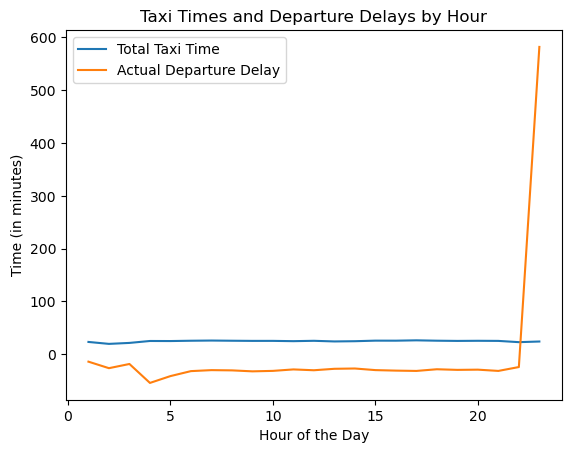

In [88]:
# Creating a line plot of the mean of the total taxi time and departure actual delay against hour of the day

fig, ax = plt.subplots()
train_flights_subset_taxi_time_grouped_by_hour['total_taxi_time'].plot(ax=ax, label='Total Taxi Time')
train_flights_subset_taxi_time_grouped_by_hour['dep_actual_delay'].plot(ax=ax, label='Actual Departure Delay')

# Setting the titles of the plot

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Time (in minutes)')
ax.set_title('Taxi Times and Departure Delays by Hour')
ax.legend()
plt.show()

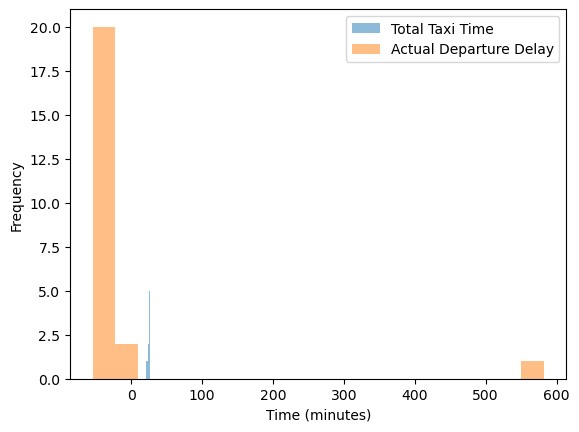

In [89]:
# Plotting the total taxi time as a histogram
fig, ax = plt.subplots()
ax.hist(train_flights_subset_taxi_time_grouped_by_hour['total_taxi_time'], bins=20, alpha=0.5, label='Total Taxi Time')

# Plotting the actual departure delay as a histogram
ax.hist(train_flights_subset_taxi_time_grouped_by_hour['dep_actual_delay'], bins=20, alpha=0.5, label='Actual Departure Delay')

# set axis labels and legend
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Frequency')
ax.legend()

# show the plot
plt.show()

From the new dataframe and the plot above, it is noted that the total taxi time is very similar during the day and it doesn't change much. At the same time, by analyzing the total taxi time in relationship with the actual departure delay variable, we can notice that the actual departure delay takes longer in the morning and evening time. This might be related with the rush hours, and airline mantainance in the evening as there are fewer people working at this time in comparison with the day. This could also be part of a further investigation in the future. 

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

To answer that question, we will calculate the percentage of the total delay that is already present at the time of departure. This is commonly known as the *departure delay rate* or the *delay propagation rate*. So we will use the 'dep_delay' and 'arr_delay' columns to calculate the departure delay rate. 

In [96]:
# Extracting the columns from our subset dataframe

train_flights_subset_average_of_delays_before_departure = train_flights_subset[['fl_date', 'mkt_carrier', 'origin', 'dest', 'dep_time', 'arr_time', 'dep_delay', 'arr_delay', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'air_time', 'distance']]
train_flights_subset_average_of_delays_before_departure

,fl_date,mkt_carrier,origin,dest,dep_time,arr_time,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance
0,2019-11-13,AA,SYR,PHL,1306.0,1408.0,-9.0,-31.0,1315,1439,84,48.0,228
1,2019-12-08,B6,OAK,JFK,2337.0,807.0,-7.0,4.0,2344,803,319,302.0,2576
2,2018-08-01,UA,CKB,IAD,606.0,653.0,-4.0,-21.0,610,714,64,30.0,151
3,2018-02-27,WN,BWI,CVG,926.0,1058.0,61.0,48.0,825,1010,105,74.0,430
4,2019-05-27,WN,IND,DEN,638.0,731.0,-2.0,6.0,640,725,165,157.0,977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,MIA,PHL,902.0,1151.0,-3.0,-5.0,905,1156,171,147.0,1013
6996,2019-02-05,AA,PHL,MIA,1041.0,1318.0,-9.0,-38.0,1050,1356,186,137.0,1013
6997,2018-12-26,AA,CLT,HPN,1117.0,1259.0,-3.0,-16.0,1120,1315,115,91.0,564
6998,2018-11-10,AA,SMF,CLT,2220.0,536.0,-8.0,-25.0,2228,601,273,238.0,2244


In [97]:
# Checking missing values as we are creating a new df from the original subset

train_flights_subset_average_of_delays_before_departure.isnull().sum()

fl_date             0
mkt_carrier         0
origin              0
dest                0
dep_time            0
arr_time            0
dep_delay           0
arr_delay           0
crs_dep_time        0
crs_arr_time        0
crs_elapsed_time    0
air_time            0
distance            0
dtype: int64

In [98]:
# Filling the missing values with the mean of the columns

train_flights_subset['dep_time'].fillna(train_flights_subset['dep_time'].mean(), inplace=True)
train_flights_subset['arr_time'].fillna(train_flights_subset['arr_time'].mean(), inplace=True)
train_flights_subset['dep_delay'].fillna(train_flights_subset['dep_delay'].mean(), inplace=True)
train_flights_subset['arr_delay'].fillna(train_flights_subset['arr_delay'].mean(), inplace=True)
train_flights_subset['arr_delay'].fillna(train_flights_subset['arr_delay'].mean(), inplace=True)
train_flights_subset['arr_delay'].fillna(train_flights_subset['arr_delay'].mean(), inplace=True)
train_flights_subset['air_time'].fillna(train_flights_subset['air_time'].mean(), inplace=True)

In [99]:
# Adding a new colum with the total of departure and arrival delays 

train_flights_subset_average_of_delays_before_departure.loc[:, 'total_delay'] = train_flights_subset_average_of_delays_before_departure['dep_delay'] + train_flights_subset_average_of_delays_before_departure['arr_delay']
train_flights_subset_average_of_delays_before_departure

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fl_date,mkt_carrier,origin,dest,dep_time,arr_time,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance,total_delay
0,2019-11-13,AA,SYR,PHL,1306.0,1408.0,-9.0,-31.0,1315,1439,84,48.0,228,-40.0
1,2019-12-08,B6,OAK,JFK,2337.0,807.0,-7.0,4.0,2344,803,319,302.0,2576,-3.0
2,2018-08-01,UA,CKB,IAD,606.0,653.0,-4.0,-21.0,610,714,64,30.0,151,-25.0
3,2018-02-27,WN,BWI,CVG,926.0,1058.0,61.0,48.0,825,1010,105,74.0,430,109.0
4,2019-05-27,WN,IND,DEN,638.0,731.0,-2.0,6.0,640,725,165,157.0,977,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,MIA,PHL,902.0,1151.0,-3.0,-5.0,905,1156,171,147.0,1013,-8.0
6996,2019-02-05,AA,PHL,MIA,1041.0,1318.0,-9.0,-38.0,1050,1356,186,137.0,1013,-47.0
6997,2018-12-26,AA,CLT,HPN,1117.0,1259.0,-3.0,-16.0,1120,1315,115,91.0,564,-19.0
6998,2018-11-10,AA,SMF,CLT,2220.0,536.0,-8.0,-25.0,2228,601,273,238.0,2244,-33.0


In [100]:
# Getting the mean of the total delay

mean_total_delay = train_flights_subset_average_of_delays_before_departure['total_delay'].mean()
print(f"The mean of the total delay is {mean_total_delay:.2f}%")

The mean of the total delay is 14.75%


As we can see from the mean calculation, 14% represents the total average of the delays caused by departure and arrival delays as they together generate other delays in correlated flights (flights with conexions). Also, it looks like that from the sample we got, the total average of delays is not so high as we thought but it is still relevant as this number represents losses for the companies and disruption among the passengers.

In [101]:
# Calculating the percentage of the departure delay rate

train_flights_subset_average_of_delays_before_departure.loc[:, 'dep_delay_rate'] = (train_flights_subset_average_of_delays_before_departure['dep_delay']) / (train_flights_subset_average_of_delays_before_departure['total_delay']) * 100
train_flights_subset_average_of_delays_before_departure

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fl_date,mkt_carrier,origin,dest,dep_time,arr_time,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance,total_delay,dep_delay_rate
0,2019-11-13,AA,SYR,PHL,1306.0,1408.0,-9.0,-31.0,1315,1439,84,48.0,228,-40.0,22.500000
1,2019-12-08,B6,OAK,JFK,2337.0,807.0,-7.0,4.0,2344,803,319,302.0,2576,-3.0,233.333333
2,2018-08-01,UA,CKB,IAD,606.0,653.0,-4.0,-21.0,610,714,64,30.0,151,-25.0,16.000000
3,2018-02-27,WN,BWI,CVG,926.0,1058.0,61.0,48.0,825,1010,105,74.0,430,109.0,55.963303
4,2019-05-27,WN,IND,DEN,638.0,731.0,-2.0,6.0,640,725,165,157.0,977,4.0,-50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,MIA,PHL,902.0,1151.0,-3.0,-5.0,905,1156,171,147.0,1013,-8.0,37.500000
6996,2019-02-05,AA,PHL,MIA,1041.0,1318.0,-9.0,-38.0,1050,1356,186,137.0,1013,-47.0,19.148936
6997,2018-12-26,AA,CLT,HPN,1117.0,1259.0,-3.0,-16.0,1120,1315,115,91.0,564,-19.0,15.789474
6998,2018-11-10,AA,SMF,CLT,2220.0,536.0,-8.0,-25.0,2228,601,273,238.0,2244,-33.0,24.242424


From this dataframe, it is noted that the airport with the origin OAK (in Oakland) with the destination in JFK (in New York) has the highest percentage of flights delays (233%).

Now, in order to answer the second part of this question, we need to create a function that can help us to classify the flights based on whether they made up for the delay during the flight or not. 

In [102]:
# Creating a function to classify the flights based on time or not

def classify_flight_on_time(total_delay):
    if total_delay <= 0:
        return 1  # The flight is on time
    else:
        return 0  # The flight is delayed (it did not make up for delay)
    
# classify_flight_on_time(total_delay)

# Apply the classify_flight_on_time() function to each value in 'total_delay'
train_flights_subset_average_of_delays_before_departure['on_time'] = train_flights_subset_average_of_delays_before_departure['total_delay'].apply(classify_flight_on_time)

# # Calling up the function to classify the flights on time
# train_flights_subset_average_of_delays_before_departure.loc['on_time'] = train_flights_subset_average_of_delays_before_departure.apply(
#     lambda row: classify_flight_on_time(row['total_delay']), 
#     axis=1
# )
train_flights_subset_average_of_delays_before_departure

/var/folders/zt/gl7xtkgj7238nsqq03s_q7840000gn/T/ipykernel_5286/4038886324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flights_subset_average_of_delays_before_departure['on_time'] = train_flights_subset_average_of_delays_before_departure['total_delay'].apply(classify_flight_on_time)


,fl_date,mkt_carrier,origin,dest,dep_time,arr_time,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance,total_delay,dep_delay_rate,on_time
0,2019-11-13,AA,SYR,PHL,1306.0,1408.0,-9.0,-31.0,1315,1439,84,48.0,228,-40.0,22.500000,1
1,2019-12-08,B6,OAK,JFK,2337.0,807.0,-7.0,4.0,2344,803,319,302.0,2576,-3.0,233.333333,1
2,2018-08-01,UA,CKB,IAD,606.0,653.0,-4.0,-21.0,610,714,64,30.0,151,-25.0,16.000000,1
3,2018-02-27,WN,BWI,CVG,926.0,1058.0,61.0,48.0,825,1010,105,74.0,430,109.0,55.963303,0
4,2019-05-27,WN,IND,DEN,638.0,731.0,-2.0,6.0,640,725,165,157.0,977,4.0,-50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,MIA,PHL,902.0,1151.0,-3.0,-5.0,905,1156,171,147.0,1013,-8.0,37.500000,1
6996,2019-02-05,AA,PHL,MIA,1041.0,1318.0,-9.0,-38.0,1050,1356,186,137.0,1013,-47.0,19.148936,1
6997,2018-12-26,AA,CLT,HPN,1117.0,1259.0,-3.0,-16.0,1120,1315,115,91.0,564,-19.0,15.789474,1
6998,2018-11-10,AA,SMF,CLT,2220.0,536.0,-8.0,-25.0,2228,601,273,238.0,2244,-33.0,24.242424,1


In [103]:
# Making a list of the carriers to see how much they can solve the flights delay

mkt_carrier_counts = train_flights_subset_average_of_delays_before_departure['mkt_carrier'].unique()
mkt_carrier_counts

array(['AA', 'B6', 'UA', 'WN', 'DL', 'AS', 'F9', 'NK', 'HA', 'G4', 'VX'],
      dtype=object)

In [104]:
# Calculating the percentage of delays for each airline

for mkt_carrier in mkt_carrier_counts:
    df_mkt_carrier_counts = train_flights_subset_average_of_delays_before_departure[train_flights_subset_average_of_delays_before_departure['mkt_carrier'] == mkt_carrier]
    number_of_flights_delays = (df_mkt_carrier_counts['total_delay'] > 0).sum()
    number_of_flights = len( df_mkt_carrier_counts)
    percentage_of_flights_delays = number_of_flights_delays / number_of_flights * 100
    print(f"{mkt_carrier}: {percentage_of_flights_delays:.2f}%")

AA: 36.32%
B6: 40.61%
UA: 36.20%
WN: 43.40%
DL: 31.41%
AS: 33.50%
F9: 42.00%
NK: 32.14%
HA: 31.76%
G4: 39.42%
VX: 40.00%


From this result, we can see that the carriers WN, F9, VX, B6 and G4 are the 5 ones that have the highest percentage (in a group of 11 carriers) of flights delays. Now let's check the ones that have the opposite (the highest count of flights made up on time): 

In [105]:
# Grouping by the marketing carrier to see which airlines can get their flights to be more on time

train_flights_subset_average_of_delays_before_departure = train_flights_subset_average_of_delays_before_departure.groupby('mkt_carrier').count()
train_flights_subset_average_of_delays_before_departure

,fl_date,origin,dest,dep_time,arr_time,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance,total_delay,dep_delay_rate,on_time
mkt_carrier,,,,,,,,,,,,,,,
AA,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1760,1762
AS,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
B6,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261
DL,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1508,1509
F9,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
G4,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
HA,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
NK,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
UA,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428


From this result, we can see that the carriers AA (American Airlines), DL (Delta Airlines), and UA (United Airlines) are the airlines that have most of the flights made up on time. Interesting to note that WN also in included in both groups (high flights delays and flights made up on time).

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the buziest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?